In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Import svm model
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Load dataset
DataFrame= {
    'hp': { 'training':  '', 'testing': '' }
}


DataFrame['hp']['training'] = pd.read_csv("Dataframe kesegaran [HP][Training].csv")
DataFrame['hp']['testing'] = pd.read_csv("Dataframe kesegaran [HP][Testing].csv")

In [3]:
DataFrame['hp']['training']

,filename,contrast_00,contrast_45,contrast_90,contrast_135,corellation_00,corellation_45,corellation_90,corellation_135,homogeneity_00,...,variance_90,variance_135,r,g,b,h,s,i,grayscale,class
0,20200713_122216.jpg,86.834461,180.486267,82.895608,114.212784,0.000808,0.000772,0.000802,0.000795,0.294752,...,1.194064e-08,1.006032e-08,0.513658,0.498590,0.585399,0.531546,0.039679,0.835914,0.526253,0
1,20200713_122401.jpg,306.555057,493.008184,317.049028,497.513423,0.000455,0.000434,0.000454,0.000433,0.170008,...,5.305295e-09,4.289468e-09,0.528285,0.525309,0.634179,0.561495,0.046532,0.574354,0.558195,0
2,20200713_122706.jpg,512.571051,828.379751,567.316129,766.123256,0.000397,0.000367,0.000393,0.000374,0.108700,...,2.258655e-09,2.045184e-09,0.582025,0.582751,0.657457,0.605711,0.036439,0.465119,0.605080,0
3,20200713_122930.jpg,234.465736,440.559489,310.669660,408.242296,0.000781,0.000709,0.000757,0.000721,0.143002,...,3.765430e-09,3.285336e-09,0.564120,0.554008,0.667310,0.593649,0.037230,0.753682,0.589146,0
4,20200713_123203.jpg,329.225640,589.283403,426.359990,529.204352,0.000521,0.000477,0.000504,0.000487,0.118289,...,2.392270e-09,2.204696e-09,0.549205,0.538962,0.662940,0.581767,0.047504,0.743506,0.577276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,20200727_191518.jpg,380.658342,576.419431,427.219673,534.608841,0.000577,0.000537,0.000570,0.000546,0.146241,...,3.672211e-09,3.200776e-09,0.457459,0.470155,0.596599,0.506907,0.051949,0.145509,0.506535,1
228,20200727_191559.jpg,132.737082,223.193378,166.629675,268.314155,0.000418,0.000411,0.000416,0.000407,0.184520,...,3.398196e-09,2.762681e-09,0.355522,0.362663,0.516327,0.410660,0.078012,0.279708,0.407886,1
229,20200727_191811.jpg,389.122478,627.611073,499.880352,685.366545,0.000706,0.000622,0.000669,0.000602,0.139533,...,2.855737e-09,2.521697e-09,0.406578,0.396713,0.596506,0.465492,0.069883,0.799177,0.457622,1
230,20200727_191915.jpg,421.980623,641.299895,484.732037,651.077996,0.000582,0.000535,0.000573,0.000533,0.120260,...,3.164109e-09,2.938118e-09,0.431577,0.461074,0.586003,0.491261,0.056487,0.064926,0.495063,1


In [4]:
DataFrame['hp']['testing']

,filename,contrast_00,contrast_45,contrast_90,contrast_135,corellation_00,corellation_45,corellation_90,corellation_135,homogeneity_00,...,variance_90,variance_135,r,g,b,h,s,i,grayscale,class
0,20200713_121834.jpg,334.300381,686.359415,502.147761,587.691797,0.000438,0.000398,0.000419,0.000409,0.148833,...,2.312038e-09,2.176395e-09,0.515688,0.515129,0.610290,0.546027,0.044610,0.519583,0.543712,0
1,20200713_122004.jpg,313.735236,472.801972,344.708661,559.870048,0.000377,0.000365,0.000375,0.000358,0.172259,...,3.883598e-09,3.143063e-09,0.539232,0.536229,0.657448,0.575874,0.052980,0.583955,0.572885,0
2,20200713_122829.jpg,232.546937,354.204476,262.255782,368.790502,0.000904,0.000854,0.000906,0.000846,0.189432,...,7.999925e-09,6.670220e-09,0.683134,0.682837,0.729271,0.697364,0.025568,0.495613,0.696924,0
3,20200713_123106.jpg,150.127584,268.808048,236.904528,317.283651,0.000939,0.000897,0.000915,0.000871,0.364109,...,1.649653e-08,1.395283e-08,0.688404,0.684884,0.720958,0.696597,0.022382,0.623696,0.696060,0
4,20200713_123734.jpg,499.763226,793.182528,558.743848,743.138260,0.000317,0.000299,0.000312,0.000302,0.083228,...,1.499202e-09,1.383672e-09,0.545593,0.538959,0.592530,0.557716,0.029428,0.688272,0.555651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,20200725_191659.jpg,480.363435,735.558683,526.184301,690.360779,0.000821,0.000661,0.000794,0.000689,0.085336,...,3.471167e-09,3.253034e-09,0.303567,0.327218,0.486871,0.371504,0.080484,0.046352,0.372258,1
94,20200727_190901.jpg,210.923659,330.528613,219.275468,318.498605,0.000629,0.000607,0.000633,0.000609,0.249846,...,9.272760e-09,8.275985e-09,0.437989,0.451090,0.556251,0.480445,0.046674,0.175105,0.481113,1
95,20200727_191225.jpg,149.844980,249.780582,181.104515,272.835452,0.000814,0.000778,0.000806,0.000769,0.175336,...,4.764749e-09,4.001856e-09,0.360352,0.348626,0.506297,0.404121,0.066912,0.826357,0.397185,1
96,20200727_191706.jpg,193.676304,338.389733,256.184301,333.688263,0.000729,0.000683,0.000708,0.000685,0.227330,...,5.836410e-09,4.902347e-09,0.313620,0.337681,0.481250,0.376425,0.080117,0.096640,0.377823,1


# RGB

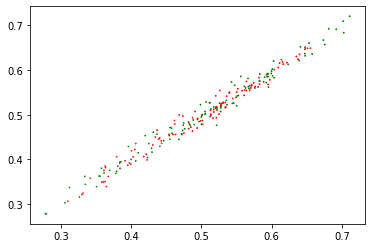

In [5]:
data_feature_training = DataFrame['hp']['training'][['r', 'g', 'b']]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['r', 'g', 'b']]
data_class_testing = DataFrame['hp']['testing']["class"]


colors = {0: 'r' , 1 : 'g' , 2: 'b' ,}
plt.scatter(data_feature_training['r'], 
            data_feature_training['g'], 
            data_feature_training['b'], 
            c=[colors[k] for k in data_class_training])

In [6]:
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58        49
           1       0.56      0.49      0.52        49

    accuracy                           0.55        98
   macro avg       0.55      0.55      0.55        98
weighted avg       0.55      0.55      0.55        98

[[30 19]
 [25 24]]


[0.49994246642117246, 0.5073530484728913]
[0.49720412558039107, 0.5053510148755757]
[0.6042711403661679, 0.6176636464374947]


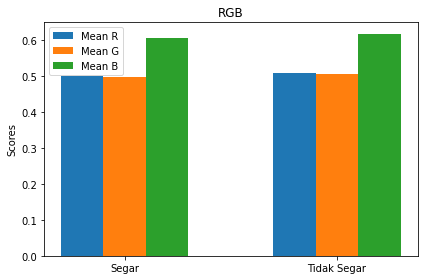

In [22]:
labels = ['Segar', 'Tidak Segar']

dataframe = DataFrame['hp']['training'][['r', 'g', 'b', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
# data_busuk = dataframe.query("`class` == 2")


r_means = [np.mean(data_segar['r']), np.mean(data_tidak_segar['r'])]
print(r_means)
g_means = [np.mean(data_segar['g']), np.mean(data_tidak_segar['g'])]
print(g_means)
b_means = [np.mean(data_segar['b']), np.mean(data_tidak_segar['b'])]
print(b_means)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, r_means, width, label='Mean R')
rects2 = ax.bar(x, g_means, width, label='Mean G')
rects3 = ax.bar(x + width, b_means, width, label='Mean B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('RGB')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# HSI

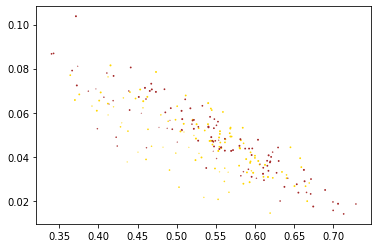

In [7]:
data_feature_training = DataFrame['hp']['training'][['h', 's', 'i']]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['h', 's', 'i']]
data_class_testing = DataFrame['hp']['testing']["class"]


colors = {0: 'gold' , 1 : 'brown' , 2: 'pink' ,}
plt.scatter(data_feature_training['h'], 
            data_feature_training['s'], 
            data_feature_training['i'], 
            c=[colors[k] for k in data_class_training])

In [8]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49        49
           1       0.50      0.51      0.51        49

    accuracy                           0.50        98
   macro avg       0.50      0.50      0.50        98
weighted avg       0.50      0.50      0.50        98

[[24 25]
 [24 25]]


In [ ]:
labels = ['Mean H', 'Mean S', 'Mean I']

dataframe = DataFrame['hp']['training'][['h', 's', 'i', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


h_means = [np.mean(data_segar['h']), np.mean(data_tidak_segar['h']), np.mean(data_busuk['h'])]
print(h_means)
s_means = [np.mean(data_segar['s']), np.mean(data_tidak_segar['s']), np.mean(data_busuk['s'])]
print(s_means)
i_means = [np.mean(data_segar['i']), np.mean(data_tidak_segar['i']), np.mean(data_busuk['i'])]
print(i_means)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, h_means, width, label='Segar')
rects2 = ax.bar(x, s_means, width, label='Tidak Segar')
rects3 = ax.bar(x + width, i_means, width, label='Busuk')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# GRAYSCALE

In [9]:
data_feature_training = DataFrame['hp']['training'][['grayscale',]]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['grayscale',]]
data_class_testing = DataFrame['hp']['testing']["class"]


# colors = {0: 'black' , 1 : 'red' , 2: 'blue' ,}
# plt.scatter(data_feature_training['grayscale'],y=""
#             c=[colors[k] for k in data_class_training])

In [10]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.53      0.53        49
           1       0.52      0.51      0.52        49

    accuracy                           0.52        98
   macro avg       0.52      0.52      0.52        98
weighted avg       0.52      0.52      0.52        98

[[26 23]
 [24 25]]


In [ ]:
labels = ['Mean Grayscale']

dataframe = DataFrame['hp']['testing'][['grayscale', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


h_means = np.mean(data_segar['grayscale'])
print(h_means)
s_means = np.mean(data_tidak_segar['grayscale'])
print(s_means)
i_means = np.mean(data_busuk['grayscale'])
print(i_means)


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, h_means, width, label='Segar', color='green')
rects2 = ax.bar(x, s_means, width, label='Tidak Segar' , color='yellow')
rects3 = ax.bar(x + width, i_means, width, label='Busuk',  color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# GLCM

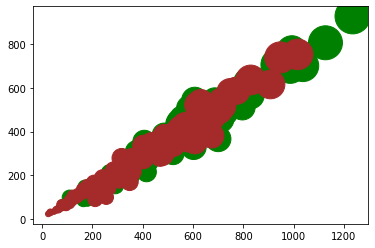

In [11]:
data_feature_training = DataFrame['hp']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    ]]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                  ]]
data_class_testing = DataFrame['hp']['testing']["class"]


colors = {0: 'green' , 1 : 'brown' , 2: 'magenta' ,}
plt.scatter(
#             data_feature_training['contrast_00'],
            data_feature_training['contrast_45'],
            data_feature_training['contrast_90'],
            data_feature_training['contrast_135'],
#             data_feature_training['corellation_00'],
#             data_feature_training['corellation_45'],
#             data_feature_training['corellation_90'],
#             data_feature_training['corellation_135'],
#             data_feature_training['homogeneity_00'],
#             data_feature_training['homogeneity_45'],
#             data_feature_training['homogeneity_90'],
#             data_feature_training['homogeneity_135'],
#             data_feature_training['entropy_00'],
#             data_feature_training['entropy_45'],
#             data_feature_training['entropy_90'],
#             data_feature_training['entropy_135'],
#             data_feature_training['variance_00'],
#             data_feature_training['variance_45'],
#             data_feature_training['variance_90'],
#             data_feature_training['variance_135'],
            c=[colors[k] for k in data_class_training])

In [12]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65        49
           1       0.65      0.63      0.64        49

    accuracy                           0.64        98
   macro avg       0.64      0.64      0.64        98
weighted avg       0.64      0.64      0.64        98

[[32 17]
 [18 31]]


# GLCM+RGB

In [13]:
data_feature_training = DataFrame['hp']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'r',
                                                    'g',
                                                    'b',
                                                    ]]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'r',
                                                    'g',
                                                    'b',
                                                  ]]
data_class_testing = DataFrame['hp']['testing']["class"]

In [14]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65        49
           1       0.65      0.63      0.64        49

    accuracy                           0.64        98
   macro avg       0.64      0.64      0.64        98
weighted avg       0.64      0.64      0.64        98

[[32 17]
 [18 31]]


# GLCM+HSI

In [15]:
data_feature_training = DataFrame['hp']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'h',
                                                    's',
                                                    'i',
                                                    ]]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'h',
                                                    's',
                                                    'i',
                                                  ]]
data_class_testing = DataFrame['hp']['testing']["class"]


In [16]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65        49
           1       0.65      0.63      0.64        49

    accuracy                           0.64        98
   macro avg       0.64      0.64      0.64        98
weighted avg       0.64      0.64      0.64        98

